In [165]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from math import gcd

In [191]:
PI = 3.14159265358979
wave_length = 1.0
k = 2*PI / wave_length
n_ = 120*PI
num = 64
r = 10 * wave_length

In [192]:
nx = 5
ny = 5
c = wave_length / 4

In [193]:
class MetaSurface():
    def __init__(self, nx, ny):
        self.nx = nx
        self.ny = ny
    
    def set_metasurface_field(self, bx, by):
        self.ex = np.ones((nx, ny))
        self.ey = np.zeros((nx, ny))
        self.hx = np.zeros((nx, ny))
        self.hy = np.zeros((nx, ny))
    
    def equivalence_principle(self):
        mx = self.ey
        my = -self.ex
        jx = -self.hy
        jy = self.hx
        return (mx, my, jx, jy)
    
    def get_array_factor(self, theta0, phi0):
        array_factor = np.zeros((num//4, num), dtype=np.complex128)
        xid = np.arange(0, nx, 1)
        yid = np.arange(0, ny, 1)
        px = np.sin(theta0)*np.cos(phi0)
        py = np.sin(theta0)*np.sin(phi0)
        
        #row : theta, col : phi
        for i in range(num//4):
            for j in range(num):
                theta = 2*PI/num*i
                phi = 2*PI/num*j
                x_expon = np.exp(1j*k*c*(np.sin(theta)*np.cos(phi) - px)*xid)
                y_expon = np.exp(1j*k*c*(np.sin(theta)*np.sin(phi) - py)*yid)
                array_factor[i, j] = np.sum(x_expon * np.vstack(y_expon))
        self.array_factor = array_factor
        return array_factor
    
    def get_dir(self, theta0, phi0):
        theta = np.linspace(0, PI/2, num//4)
        sin_theta = np.vstack(np.sin(theta))
        
        array_factor = self.get_array_factor(theta0, phi0)
        u = np.real(array_factor*np.conj(array_factor))
        pr = 1/(4*PI)*np.sum(u*sin_theta*(4*PI*PI/(num**2))) 
        self.dir = 10*np.log10(u/pr)
        return self.dir
    

    def plot_dir(self, theta0, phi0):
        d = self.get_dir(theta0, phi0)
        d[d<0] = 0
        theta = np.linspace(0, PI/2, num//4)
        phi = np.linspace(0, PI*2, num)
        phi_, theta_ = np.meshgrid(phi, theta)
        x = d * np.vstack(np.sin(theta_)) * np.cos(phi_)
        y = d * np.vstack(np.sin(theta_)) * np.sin(phi_)
        z = d * np.vstack(np.cos(theta_))
        
        dmax = np.max(d)
        print(dmax)
        i, j = np.unravel_index(np.argmax(d, axis=None), d.shape)
        print(i)
        print(j)
        
        ax = plt.axes(projection='3d')
        ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        ax.set_title('surface');
        ax.set_xlim([-35, 35])
        ax.set_ylim([-35, 35])
        ax.set_zlim(bottom = 0.0)

In [194]:
metasurface = MetaSurface(nx, ny)

11.830172177444089
8
32


<IPython.core.display.Javascript object>


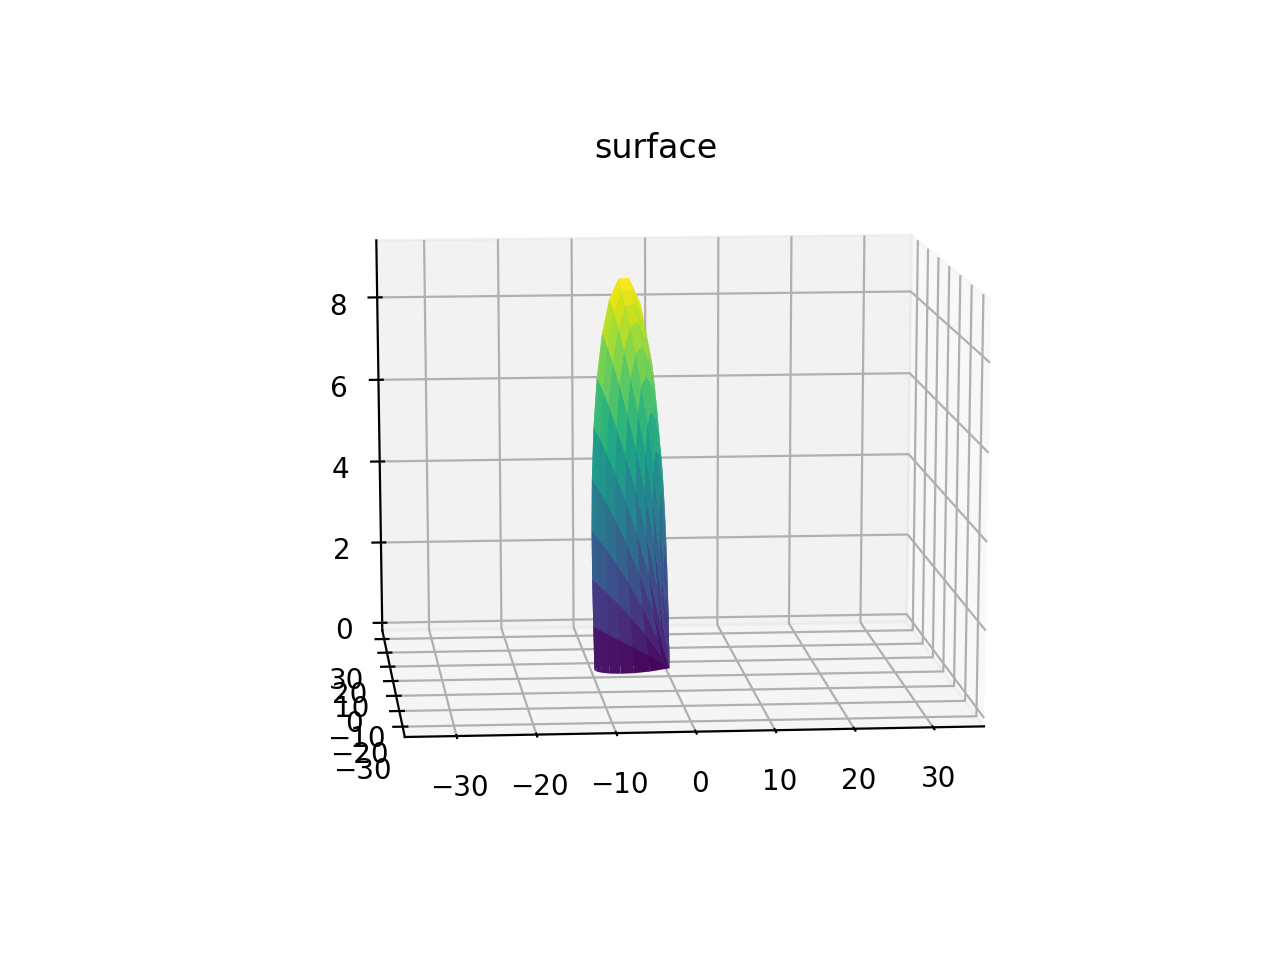

In [196]:
metasurface.plot_dir(PI/4, PI)